#### KNN algorithm used for both classification and Regression
#### Supervised learning Algorithm
#### First find the distance from all other points and then consider the nearest k point and then take a majority vote
#### As learning is 0 so a non parametic all the work happen at query time
#### baseline Algorithm i.e if we are inventing the new algorithm than compare it with knn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dfx=pd.read_csv('./Knn_Data/xdata.csv')
dfy=pd.read_csv('./Knn_Data/ydata.csv')

# Converting the above data to numpy array

X=dfx.values
Y=dfy.values

print(X.shape)
print(Y.shape)

(399, 3)
(399, 2)


In [2]:
# Here first coloumn in X and Y represent the serial number which we want to disgard
# Hence droping the first coloumn in X and Y

# droping the first coloums of csv file as it is a serial number and flatten the Y into a single array
# This syntax is for all rows ,start taking the coloumns after first coloumn

X=X[:,1:]
Y=Y[:,1:].reshape((-1))

print(X.shape)
print(Y.shape)

(399, 2)
(399,)


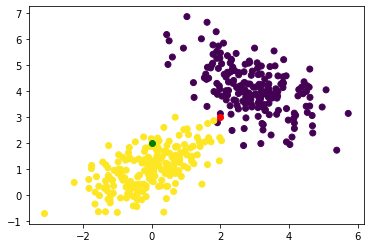

In [8]:
query=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query[0],query[1],color='red')
plt.scatter(0,2,color='green')
plt.show()

In [10]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
    # example if x1 is (1,3,3) and x2 is (4,5,6) the distance is sqrt(9+4+9)
    # This is basically euclidian distance however we can take any distance

    
    
    


def KNN(X,Y,query_point,K=5):
# this function takes X and Y query point and how many nearest neighbour we want to consider i.e K 
# In vals we append dist along with their correspoing label i.e Y[i] as we are also given with the label so supervised
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=distance(query_point,X[i])
        vals.append((d,Y[i]))
    
    # Sort on the basis of distance (first parameter of vals) and then took nearest K
    vals=sorted(vals)
    # Nearest K points 
    vals=vals[:K]
    # After that converting it into numpy as array so that more operation could take place
    vals=np.array(vals)
    
    
    
    
    # In first cols and all the rows searching the frequency of unique 0 and 1
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    index=new_vals[1].argmax()
    # argmax will give the index where there is the maximum frequency
    pred=new_vals[0][index]
    return pred
    

(array([0., 1.]), array([3, 2]))


### Here the 0. and 1. are the labels and 3 and 2 is there frequency so we have to use the label with max freq

In [14]:
x=KNN(X,Y,[2,3])
print(x)
x=KNN(X,Y,[0,0])
print(x)

(array([0., 1.]), array([3, 2]))
0.0
(array([1.]), array([5]))
1.0
